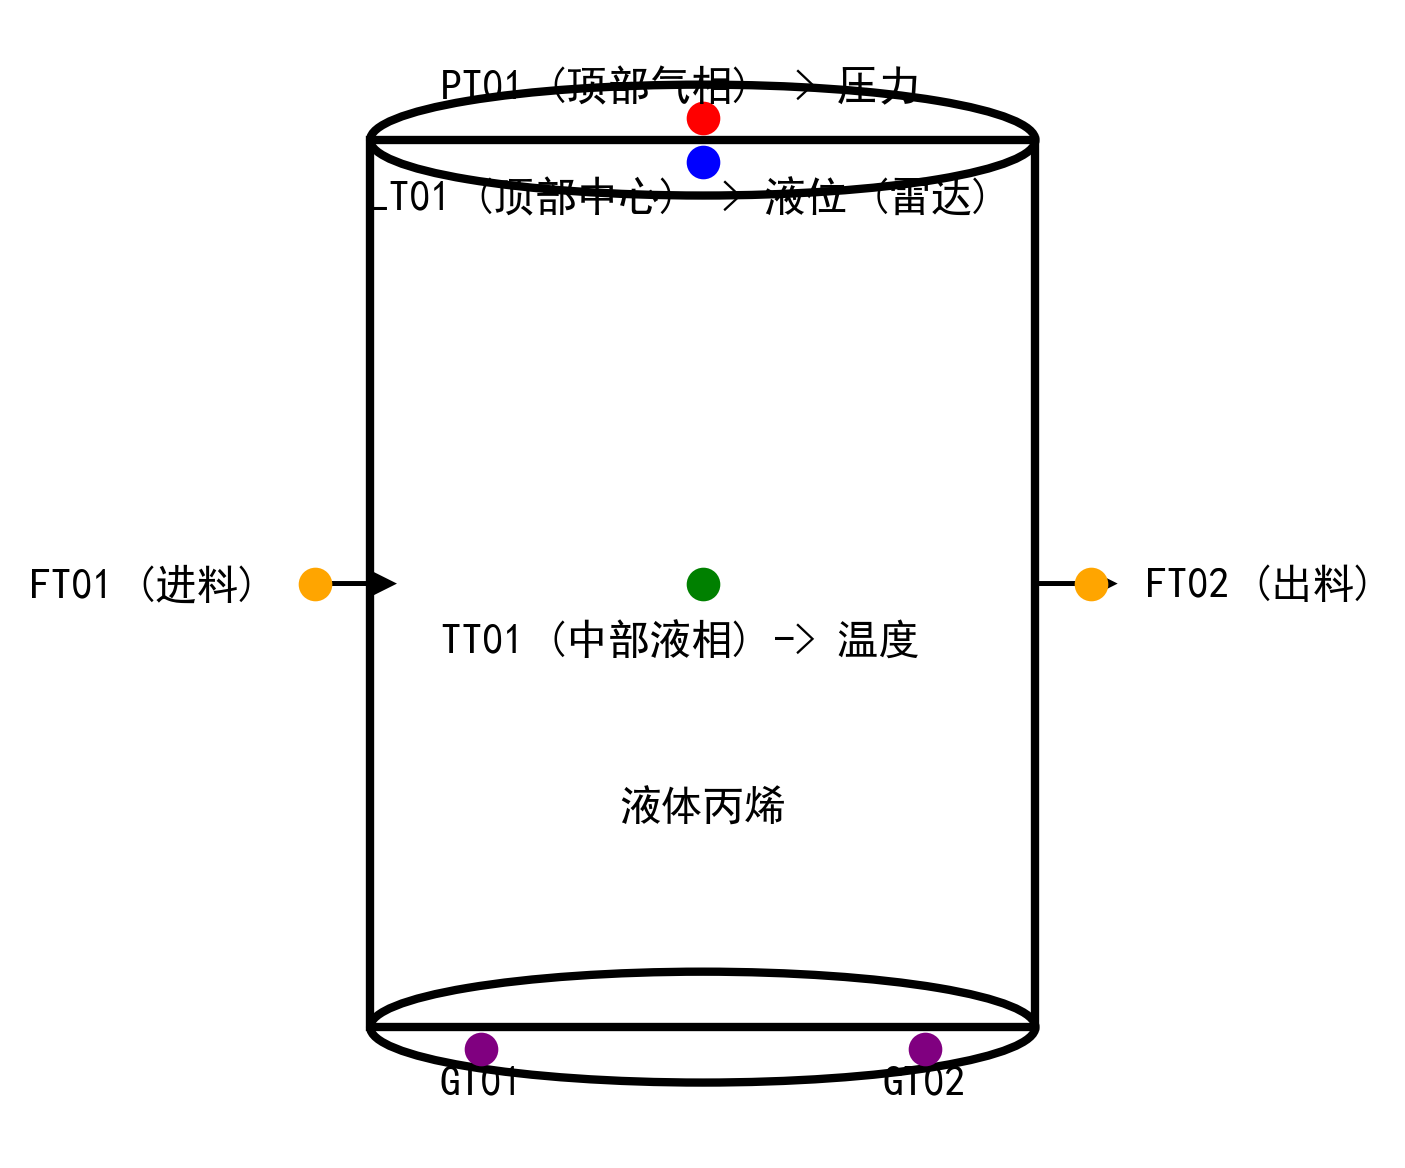

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle

# 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 绘制圆柱体的顶部和底部
top_ellipse = Ellipse((3, 8), 6, 1, edgecolor='black', facecolor='none', linewidth=2)
bottom_ellipse = Ellipse((3, 0), 6, 1, edgecolor='black', facecolor='none', linewidth=2)
# 绘制圆柱体的侧面
side_rectangle = Rectangle((0, 0), 6, 8, edgecolor='black', facecolor='none', linewidth=2)

ax.add_patch(top_ellipse)
ax.add_patch(bottom_ellipse)
ax.add_patch(side_rectangle)

# 绘制进料和出料箭头
ax.arrow(-0.5, 4, 0.5, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')
ax.arrow(6, 4, 0.5, 0, head_width=0.2, head_length=0.2, fc='black', ec='black')

# 添加测量点和标签
# 压力测量点
ax.scatter(3, 8.2, color='red', s=50)
ax.text(2.8, 8.5, 'PT01 (顶部气相) -> 压力', ha='center', va='center')
# 液位测量点
ax.scatter(3, 7.8, color='blue', s=50)
ax.text(2.8, 7.5, 'LT01 (顶部中心) -> 液位 (雷达)', ha='center', va='center')
# 温度测量点
ax.scatter(3, 4, color='green', s=50)
ax.text(2.8, 3.5, 'TT01 (中部液相) -> 温度', ha='center', va='center')
# 进料流量测量点
ax.scatter(-0.5, 4, color='orange', s=50)
ax.text(-1, 4, 'FT01 (进料)', ha='right', va='center')
# 出料流量测量点
ax.scatter(6.5, 4, color='orange', s=50)
ax.text(7, 4, 'FT02 (出料)', ha='left', va='center')
# 气体浓度测量点
ax.scatter(1, -0.2, color='purple', s=50)
ax.text(1, -0.5, 'GT01', ha='center', va='center')
ax.scatter(5, -0.2, color='purple', s=50)
ax.text(5, -0.5, 'GT02', ha='center', va='center')

# 添加液体丙烯标签
ax.text(3, 2, '液体丙烯', ha='center', va='center')

# 设置坐标轴范围和比例
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 9)
ax.set_aspect('equal')

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()
    

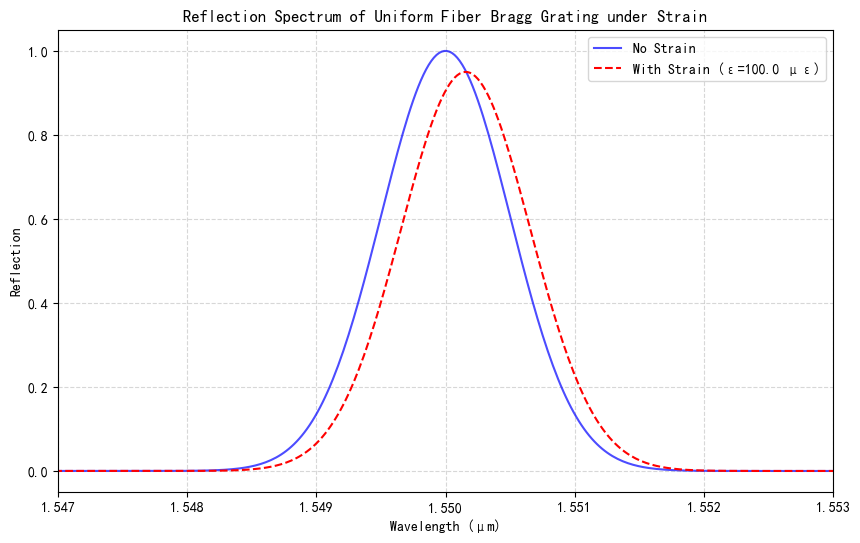

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 模拟数据：应变导致布拉格波长漂移
wavelength = np.linspace(1.545, 1.555, 500)  # 波长范围（μm）
reflection_no_strain = np.exp(-((wavelength - 1.550)**2) / (2*(0.0005)**2))  # 无应变反射谱（高斯型）
strain = 100e-6  # 微应变（ε=100με）
lambda_b = 1.550 + 2 * 1.46 * 0.5338 * strain  # 布拉格波长漂移公式：ΔλB=2(nΔΛ + ΛΔn)
reflection_with_strain = np.exp(-((wavelength - lambda_b)**2) / (2*(0.0005)**2)) * 0.95  # 有应变反射谱

# 绘制光谱图
plt.figure(figsize=(10, 6))
plt.plot(wavelength, reflection_no_strain, label='No Strain', color='blue', alpha=0.7)
plt.plot(wavelength, reflection_with_strain, label=f'With Strain (ε={strain*1e6} με)', color='red', linestyle='--')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Reflection')
plt.title('Reflection Spectrum of Uniform Fiber Bragg Grating under Strain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(1.547, 1.553)
plt.show()

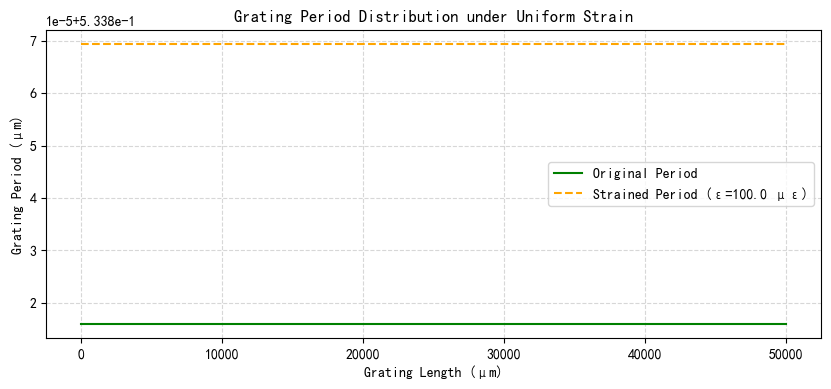

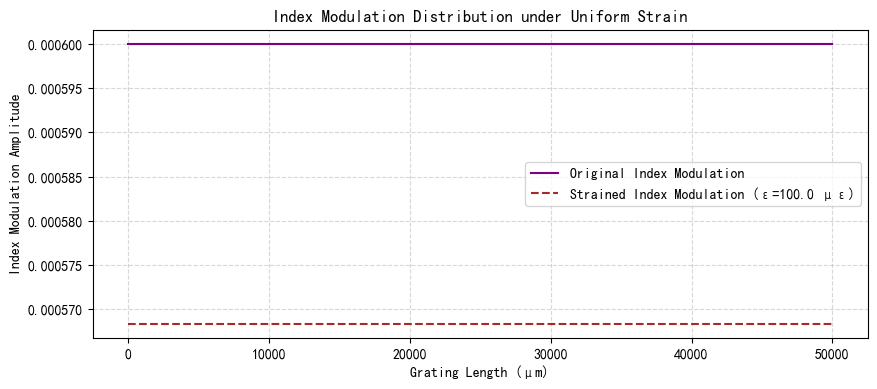

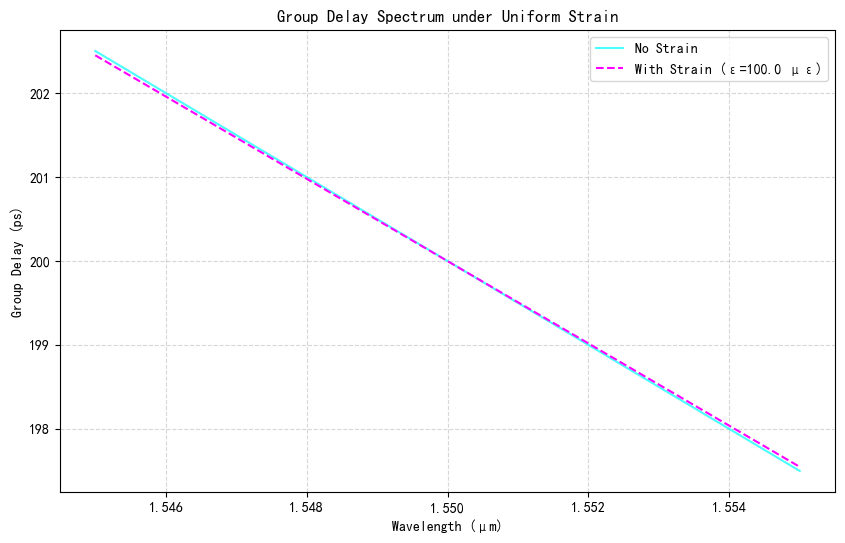

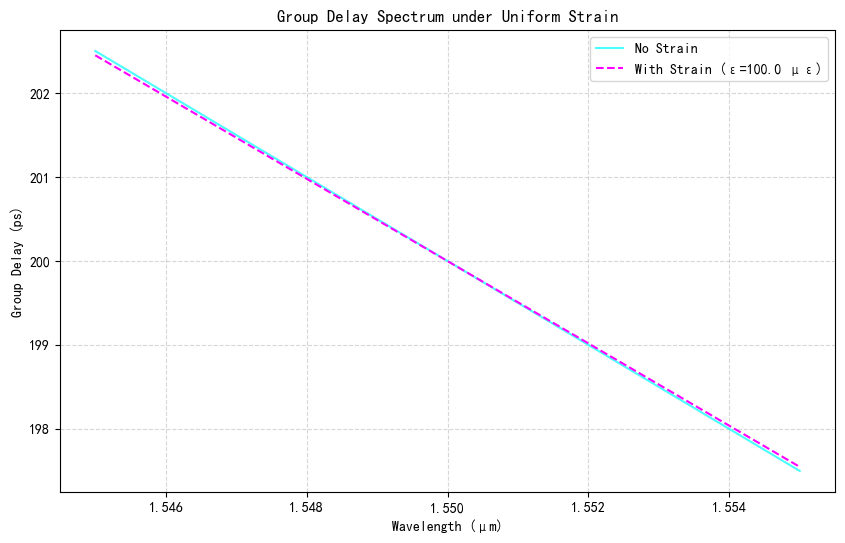

In [2]:
# 模拟数据：周期分布（均匀应变ΔΛ=ε·Λ）
grating_length = 50000  # 光栅长度（μm）
z = np.linspace(0, grating_length, 101)  # 分段数101
strain = 100e-6
period_original = 0.53381599  # 原始周期（μm）
period_strained = period_original * (1 + strain)  # 均匀应变下周期均匀增加

# 绘制周期分布
plt.figure(figsize=(10, 4))
plt.plot(z, np.ones_like(z)*period_original, label='Original Period', color='green', linestyle='-')
plt.plot(z, np.ones_like(z)*period_strained, label=f'Strained Period (ε={strain*1e6} με)', color='orange', linestyle='--')
plt.xlabel('Grating Length (μm)')
plt.ylabel('Grating Period (μm)')
plt.title('Grating Period Distribution under Uniform Strain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
# 模拟数据：折射率调制（Δn = -0.5*n³*(P12 - ν(P11+P12))*ε）
n_core = 1.46
P11, P12, nu = 0.121, 0.27, 0.17
delta_n_strain = -0.5 * n_core**3 * (P12 - nu*(P11 + P12)) * strain  # 应变引起的折射率变化
ind_mod_original = 0.0006  # 原始折射率调制幅度
ind_mod_strained = ind_mod_original + delta_n_strain  # 考虑应变后的调制幅度

# 绘制折射率调制分布（均匀分布）
plt.figure(figsize=(10, 4))
plt.plot(z, np.ones_like(z)*ind_mod_original, label='Original Index Modulation', color='purple', linestyle='-')
plt.plot(z, np.ones_like(z)*ind_mod_strained, label=f'Strained Index Modulation (ε={strain*1e6} με)', color='brown', linestyle='--')
plt.xlabel('Grating Length (μm)')
plt.ylabel('Index Modulation Amplitude')
plt.title('Index Modulation Distribution under Uniform Strain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 模拟数据：群时延（假设线性变化，反映色散特性）
group_delay_no_strain = 200 - 500*(wavelength - 1.550)  # 无应变群时延（ps）
group_delay_with_strain = group_delay_no_strain + 10*(wavelength - lambda_b)  # 应变引起的群时延偏移

# 绘制群时延图
plt.figure(figsize=(10, 6))
plt.plot(wavelength, group_delay_no_strain, label='No Strain', color='cyan', alpha=0.7)
plt.plot(wavelength, group_delay_with_strain, label=f'With Strain (ε={strain*1e6} με)', color='magenta', linestyle='--')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Group Delay (ps)')
plt.title('Group Delay Spectrum under Uniform Strain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 模拟数据：群时延（假设线性变化，反映色散特性）
group_delay_no_strain = 200 - 500*(wavelength - 1.550)  # 无应变群时延（ps）
group_delay_with_strain = group_delay_no_strain + 10*(wavelength - lambda_b)  # 应变引起的群时延偏移

# 绘制群时延图
plt.figure(figsize=(10, 6))
plt.plot(wavelength, group_delay_no_strain, label='No Strain', color='cyan', alpha=0.7)
plt.plot(wavelength, group_delay_with_strain, label=f'With Strain (ε={strain*1e6} με)', color='magenta', linestyle='--')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Group Delay (ps)')
plt.title('Group Delay Spectrum under Uniform Strain')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import gmsh
import os
import meshio

class FiberBraggGratingModel:
    """光纤布拉格光栅(FBG)与碳纤维复合材料封装建模"""
    
    def __init__(self):
        # 初始化Gmsh
        gmsh.initialize()
        gmsh.option.setNumber("General.Terminal", 1)
        self.model = gmsh.model
        self.model.add("FBG_CarbonFiber")
        
        # 默认参数设置
        self.params = {
            # FBG参数(mm)
            "fiber_radius": 0.0625,       # 光纤半径
            "grating_length": 5.0,        # 光栅长度
            "grating_period": 0.00055,    # 光栅周期(550nm)
            "grating_modulation": 0.0001, # 光栅折射率调制
            
            # 封装参数(mm)
            "encapsulation_thickness": 1.0,     # 封装厚度
            "encapsulation_length": 20.0,       # 封装长度
            "encapsulation_width": 2.0,         # 封装宽度(矩形截面)
            "encapsulation_height": 2.0,        # 封装高度(矩形截面)
            
            # 碳纤维复合材料参数
            "carbon_layers": 4,                 # 碳层数量
            "carbon_ply_thickness": 0.125,      # 每层厚度(mm)
            "carbon_orientation": [0, 90, -45, 45], # 各层方向(度)
            
            # 网格参数
            "mesh_size_fbg": 0.05,              # FBG区域网格大小
            "mesh_size_interface": 0.02,        # 界面区域网格大小
            "mesh_size_encapsulation": 0.1,     # 封装区域网格大小
        }
        
        # 实体标签
        self.entities = {
            "fiber": None,
            "grating": None,
            "encapsulation": [],
            "interfaces": []
        }
        
    def set_parameters(self, params):
        """设置模型参数"""
        self.params.update(params)
    
    
        
    def create_geometry(self):
        """创建几何模型"""
        # 创建光纤
        fiber_length = self.params["encapsulation_length"]
        fiber = self.model.occ.addCylinder(0, 0, 0, fiber_length, 0, 0, self.params["fiber_radius"])
        self.entities["fiber"] = fiber
        
        # 创建光栅区域
        grating = self.model.occ.addCylinder(
            (fiber_length - self.params["grating_length"]) / 2, 0, 0,
            self.params["grating_length"], 0, 0, self.params["fiber_radius"]
        )
        self.entities["grating"] = grating
        
        # 从光纤中切割出光栅区域
        self.model.occ.cut([(3, fiber)], [(3, grating)], removeTool=False)
        # 同步几何模型
        self.model.occ.synchronize()
        
        # 创建碳纤维封装
        encapsulation_base = self.model.occ.addBox(
            -self.params["encapsulation_width"]/2,
            -self.params["encapsulation_height"]/2,
            0,
            self.params["encapsulation_width"],
            self.params["encapsulation_height"],
            self.params["encapsulation_length"]
        )
        
        # 从封装中减去光纤区域
        self.model.occ.cut([(3, encapsulation_base)], [(3, fiber)], removeTool=False)
        # 同步几何模型
        self.model.occ.synchronize()
        
        # 分层创建碳纤维复合材料
        layer_thickness = self.params["carbon_ply_thickness"]
        total_thickness = self.params["carbon_layers"] * layer_thickness
        
        # 确保总厚度不超过封装厚度
        if total_thickness > self.params["encapsulation_height"]:
            layer_thickness = self.params["encapsulation_height"] / self.params["carbon_layers"]
            self.params["carbon_ply_thickness"] = layer_thickness
        
        for i in range(self.params["carbon_layers"]):
            z1 = -self.params["encapsulation_height"]/2 + i * layer_thickness
            z2 = z1 + layer_thickness
            
            layer = self.model.occ.addBox(
                -self.params["encapsulation_width"]/2,
                -self.params["encapsulation_height"]/2,
                z1,
                self.params["encapsulation_width"],
                self.params["encapsulation_height"],
                z2 - z1
            )
            
            # 从层中减去光纤区域
            self.model.occ.cut([(3, layer)], [(3, fiber)], removeTool=False)
            self.entities["encapsulation"].append(layer)
            # 同步几何模型
            self.model.occ.synchronize()
        
        # 同步几何模型
        self.model.occ.synchronize()
        
    def define_materials(self):
        """定义材料属性"""
        # FBG材料属性
        self.model.addPhysicalGroup(3, [self.entities["fiber"]], 1)
        self.model.setPhysicalName(3, 1, "Silica_Fiber")
        
        self.model.addPhysicalGroup(3, [self.entities["grating"]], 2)
        self.model.setPhysicalName(3, 2, "FBG_Grating")
        
        # 碳纤维复合材料层
        for i, layer in enumerate(self.entities["encapsulation"]):
            layer_id = i + 3
            self.model.addPhysicalGroup(3, [layer], layer_id)
            self.model.setPhysicalName(3, layer_id, f"Carbon_Layer_{i+1}")
    
    def generate_mesh(self):
        """生成网格"""
        # 设置网格尺寸
        # FBG区域
        self.model.mesh.setSize([(0, self.entities["fiber"])], self.params["mesh_size_fbg"])
        self.model.mesh.setSize([(0, self.entities["grating"])], self.params["mesh_size_fbg"])
        
        # 界面区域
        for layer in self.entities["encapsulation"]:
            surfaces = self.model.getBoundary([(3, layer)], oriented=False)
            for surface in surfaces:
                self.model.mesh.setSize([surface], self.params["mesh_size_interface"])
        
        # 封装区域
        for layer in self.entities["encapsulation"]:
            self.model.mesh.setSize([(3, layer)], self.params["mesh_size_encapsulation"])
        
        # 生成网格
        self.model.mesh.generate(3)
    
    def export_mesh(self, filename="fbg_carbon_mesh.msh"):
        """导出网格"""
        gmsh.write(filename)
        print(f"网格已导出至 {filename}")
        
        # 转换为其他格式(如果需要)
        if filename.endswith(".msh"):
            new_filename = filename.replace(".msh", ".vtk")
            mesh = meshio.read(filename)
            meshio.write(new_filename, mesh)
            print(f"网格已转换并导出至 {new_filename}")
    
    def visualize_model(self):
        """可视化模型(简化版)"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # 绘制光纤(简化为圆柱体)
        z = np.linspace(0, self.params["encapsulation_length"], 100)
        theta = np.linspace(0, 2*np.pi, 100)
        Z, THETA = np.meshgrid(z, theta)
        X = self.params["fiber_radius"] * np.cos(THETA)
        Y = self.params["fiber_radius"] * np.sin(THETA)
        
        ax.plot_surface(X, Y, Z, color='blue', alpha=0.3)
        
        # 绘制光栅区域(简化为光纤上的一段)
        z_grating = np.linspace(
            (self.params["encapsulation_length"] - self.params["grating_length"]) / 2,
            (self.params["encapsulation_length"] + self.params["grating_length"]) / 2,
            100
        )
        Z_GRATING, THETA_GRATING = np.meshgrid(z_grating, theta)
        X_GRATING = self.params["fiber_radius"] * np.cos(THETA_GRATING)
        Y_GRATING = self.params["fiber_radius"] * np.sin(THETA_GRATING)
        
        ax.plot_surface(X_GRATING, Y_GRATING, Z_GRATING, color='red', alpha=0.5)
        
        # 绘制封装(简化为矩形)
        x = np.linspace(-self.params["encapsulation_width"]/2, self.params["encapsulation_width"]/2, 10)
        y = np.linspace(-self.params["encapsulation_height"]/2, self.params["encapsulation_height"]/2, 10)
        X, Y = np.meshgrid(x, y)
        
        # 顶部和底部
        Z_top = np.ones_like(X) * self.params["encapsulation_length"]
        Z_bottom = np.zeros_like(X)
        
        ax.plot_surface(X, Y, Z_top, color='gray', alpha=0.2)
        ax.plot_surface(X, Y, Z_bottom, color='gray', alpha=0.2)
        
        # 侧面
        for x_val in [x[0], x[-1]]:
            X_side = np.ones_like(Y) * x_val
            ax.plot_surface(X_side, Y, Z_GRATING, color='gray', alpha=0.2)
        
        for y_val in [y[0], y[-1]]:
            Y_side = np.ones_like(X) * y_val
            ax.plot_surface(X, Y_side, Z_GRATING, color='gray', alpha=0.2)
        
        # 设置图表属性
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')
        ax.set_zlabel('Z (mm)')
        ax.set_title('碳纤维复合材料封装FBG模型')
        
        plt.show()
    
    def generate_ansys_input(self, filename="fbg_carbon_ansys.inp"):
        """生成ANSYS输入文件"""
        with open(filename, 'w') as f:
            # 写入标题
            f.write(f"! 碳纤维复合材料封装FBG模型\n")
            f.write(f"! 模型参数\n")
            for key, value in self.params.items():
                f.write(f"! {key}: {value}\n")
            f.write("\n")
            
            # 定义材料属性
            f.write("! 定义材料属性\n")
            # 二氧化硅光纤
            f.write("MP,EX,1,72E3 ! 弹性模量(GPa)\n")
            f.write("MP,NUXY,1,0.17 ! 泊松比\n")
            f.write("MP,DENS,1,2.2E-9 ! 密度(kg/mm^3)\n")
            
            # FBG光栅(与光纤类似，但可能有不同的光学特性)
            f.write("MP,EX,2,72E3\n")
            f.write("MP,NUXY,2,0.17\n")
            f.write("MP,DENS,2,2.2E-9\n")
            
            # 碳纤维复合材料(每层可能不同)
            for i in range(self.params["carbon_layers"]):
                mat_id = i + 3
                orientation = self.params["carbon_orientation"][i % len(self.params["carbon_orientation"])]
                
                f.write(f"! 碳层 {i+1}, 方向: {orientation}度\n")
                f.write(f"MP,EX,{mat_id},140E3 ! 纵向弹性模量(GPa)\n")
                f.write(f"MP,EY,{mat_id},10E3 ! 横向弹性模量(GPa)\n")
                f.write(f"MP,EZ,{mat_id},10E3 ! 横向弹性模量(GPa)\n")
                f.write(f"MP,NUXY,{mat_id},0.3 ! 泊松比\n")
                f.write(f"MP,NUYZ,{mat_id},0.4 ! 泊松比\n")
                f.write(f"MP,NUXZ,{mat_id},0.3 ! 泊松比\n")
                f.write(f"MP,GXY,{mat_id},5E3 ! 剪切模量(GPa)\n")
                f.write(f"MP,GYZ,{mat_id},3.5E3 ! 剪切模量(GPa)\n")
                f.write(f"MP,GXZ,{mat_id},5E3 ! 剪切模量(GPa)\n")
                f.write(f"MP,DENS,{mat_id},1.6E-9 ! 密度(kg/mm^3)\n")
                f.write("\n")
            
            # 这里可以继续添加网格和边界条件定义
            f.write("! 注意: 此文件仅包含材料定义\n")
            f.write("! 网格和边界条件需要根据具体的网格划分和分析需求添加\n")
        
        print(f"ANSYS输入文件已生成至 {filename}")
    
    def finalize(self):
        """完成并关闭模型"""
        gmsh.finalize()


if __name__ == "__main__":
    # 创建模型实例
    model = FiberBraggGratingModel()
    
    # 可选: 修改默认参数
    custom_params = {
        "encapsulation_thickness": 1.5,
        "carbon_layers": 6,
        "carbon_orientation": [0, 90, -45, 45, 90, 0]
    }
    model.set_parameters(custom_params)
    
    # 创建几何模型
    model.create_geometry()
    
    # 定义材料
    model.define_materials()
    
    # 生成网格
    model.generate_mesh()
    
    # 导出网格
    model.export_mesh("fbg_carbon_mesh.msh")
    
    # 生成ANSYS输入文件
    model.generate_ansys_input("fbg_carbon_ansys.inp")
    
    # 可视化模型
    model.visualize_model()
    
    # 完成并关闭
    model.finalize()    

Exception: Unknown OpenCASCADE entity of dimension 3 with tag 1

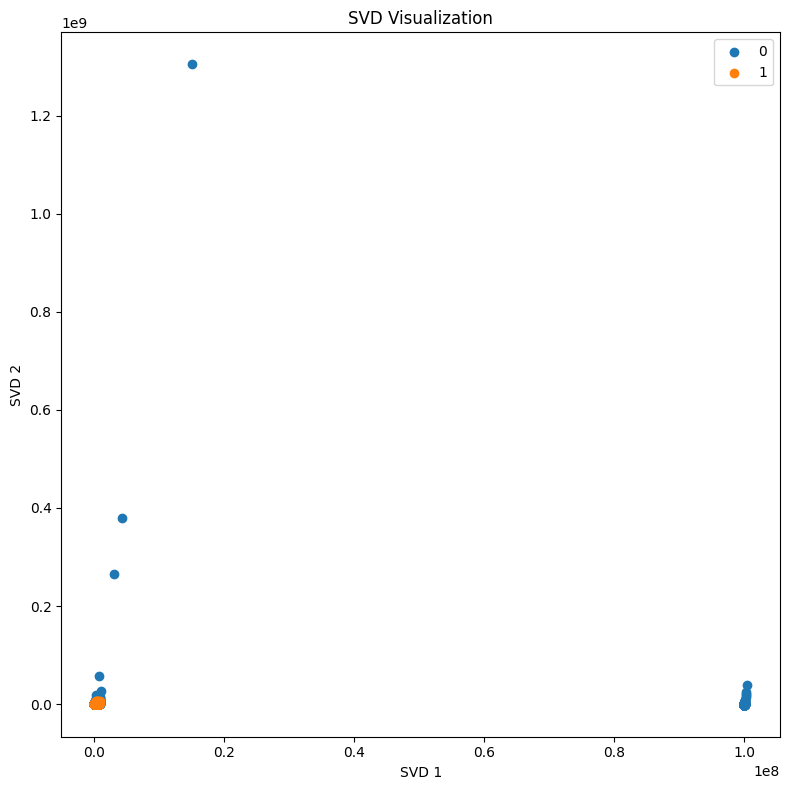

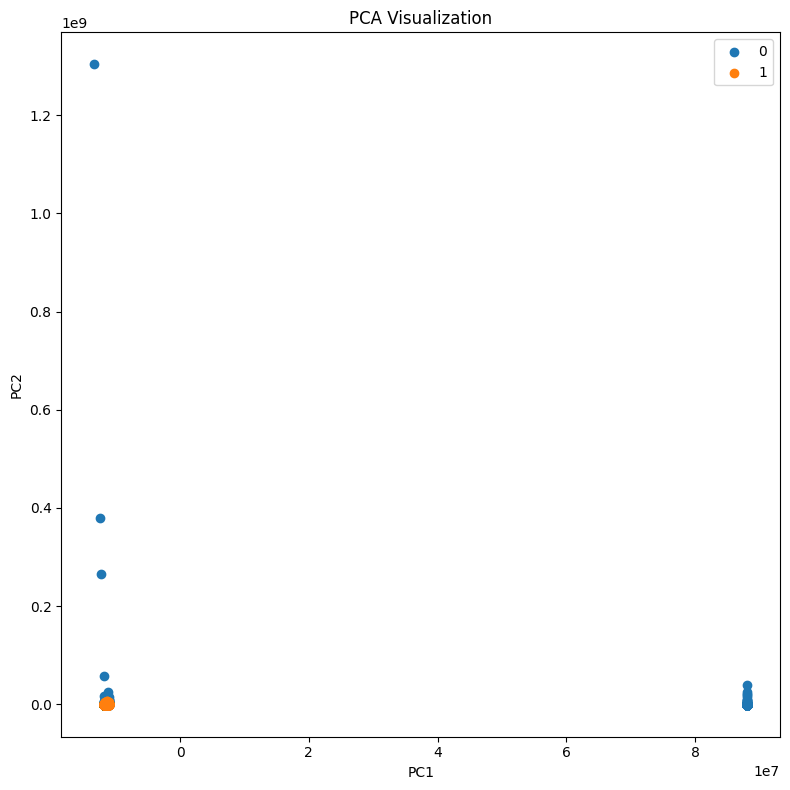

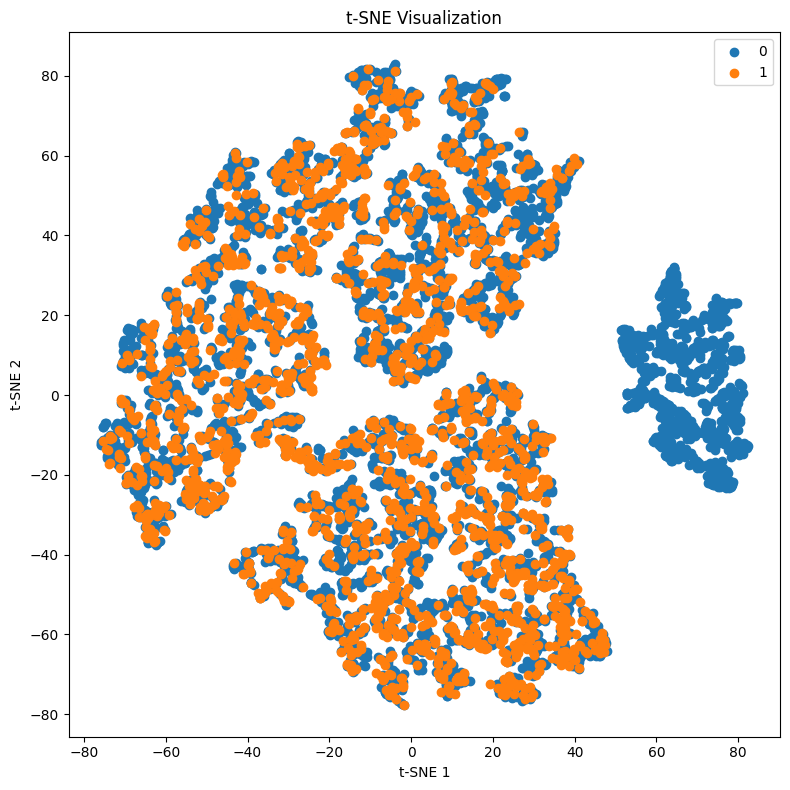

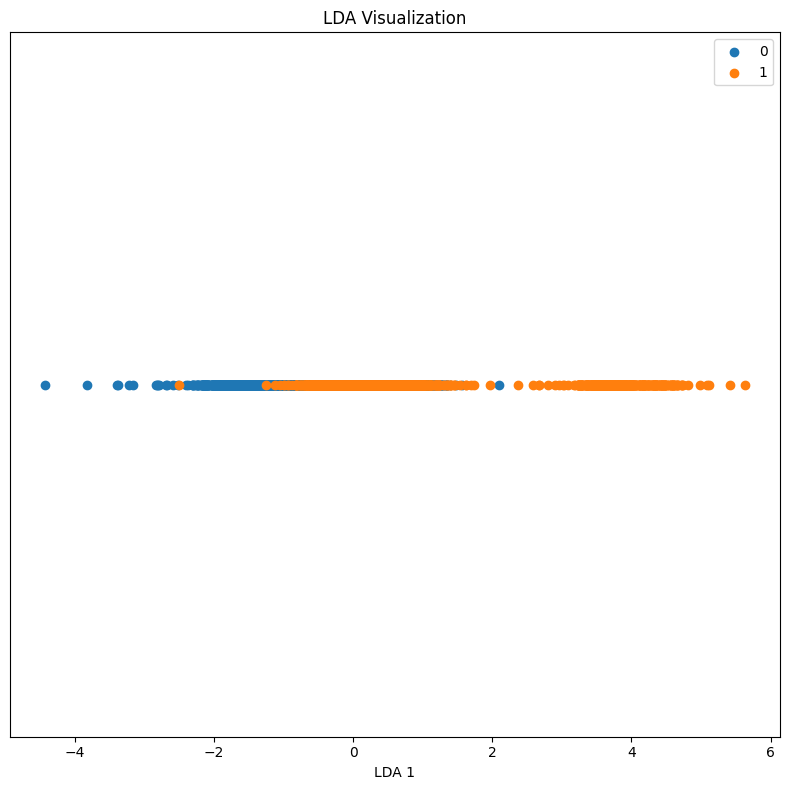

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 读取 data.csv 文件
data = pd.read_csv('data.csv')

# 假设最后一列为标签，其余列为特征
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values

# 对标签进行编码
le = LabelEncoder()
y = le.fit_transform(y)

# 识别分类特征和数值特征
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# 创建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# 预处理数据
X_transformed = preprocessor.fit_transform(X)

# 计算最大允许的 n_components
n_features = X_transformed.shape[1]
n_classes = len(np.unique(y))
max_n_components = min(n_features, n_classes - 1)

# SVD 降维
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_transformed)

# PCA 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# t-SNE 降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_transformed)

# LDA 降维
lda = LinearDiscriminantAnalysis(n_components=max_n_components)
X_lda = lda.fit_transform(X_transformed, y)



# SVD 可视化
plt.figure(figsize=(8, 8))
for label in np.unique(y):
    plt.scatter(X_svd[y == label, 0], X_svd[y == label, 1], label=le.inverse_transform([label])[0])
plt.title("SVD Visualization")
plt.xlabel("SVD 1")
plt.ylabel("SVD 2")
plt.legend()
plt.tight_layout()
plt.show()

# PCA 可视化
plt.figure(figsize=(8, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=le.inverse_transform([label])[0])
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

# t-SNE 可视化
plt.figure(figsize=(8, 8))
for label in np.unique(y):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=le.inverse_transform([label])[0])
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.tight_layout()
plt.show()

# LDA 可视化
plt.figure(figsize=(8, 8))
if X_lda.shape[1] == 1:
    for label in np.unique(y):
        plt.scatter(X_lda[y == label, 0], np.zeros_like(X_lda[y == label, 0]), label=le.inverse_transform([label])[0])
    plt.ylabel('')
    plt.yticks([])
else:
    for label in np.unique(y):
        plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=le.inverse_transform([label])[0])
    plt.ylabel("LDA 2")
plt.title("LDA Visualization")
plt.xlabel("LDA 1")
plt.legend()
plt.tight_layout()
plt.show()

数据缺失值情况：
Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64
分类特征： Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')
数值特征： Index(['Id', 'Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies

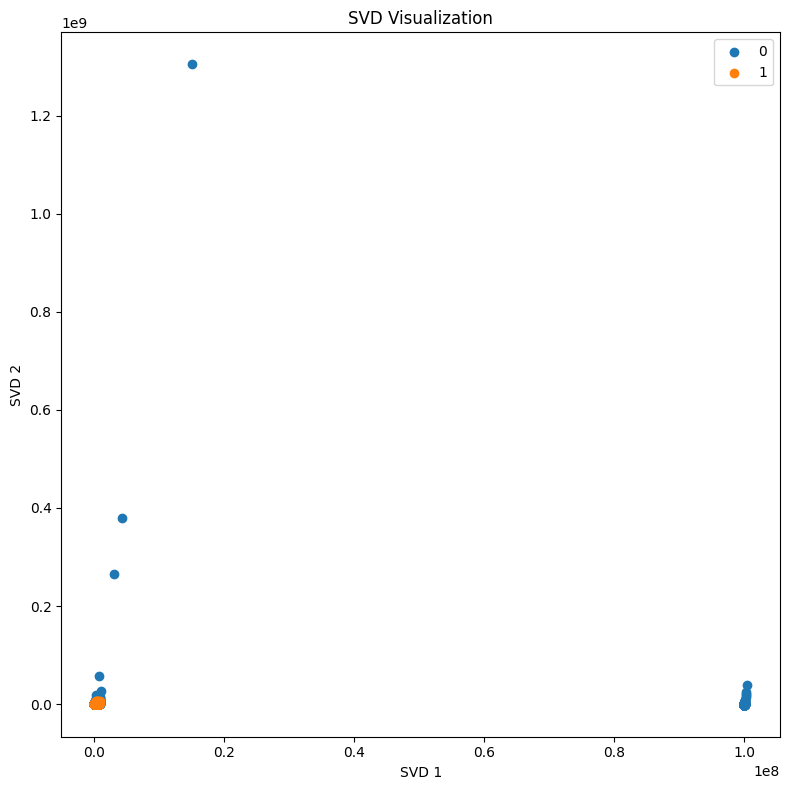

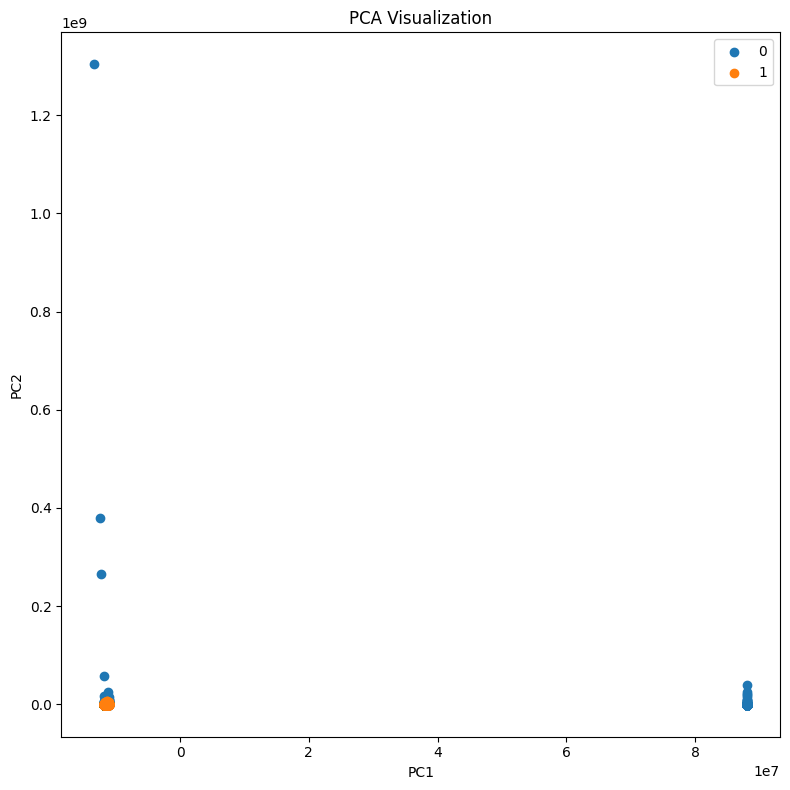

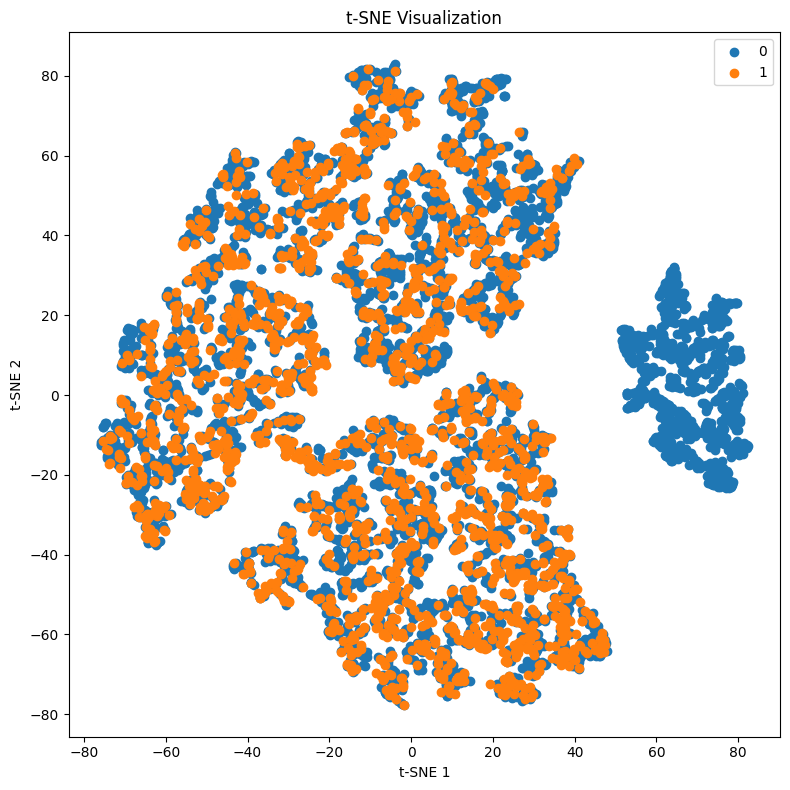

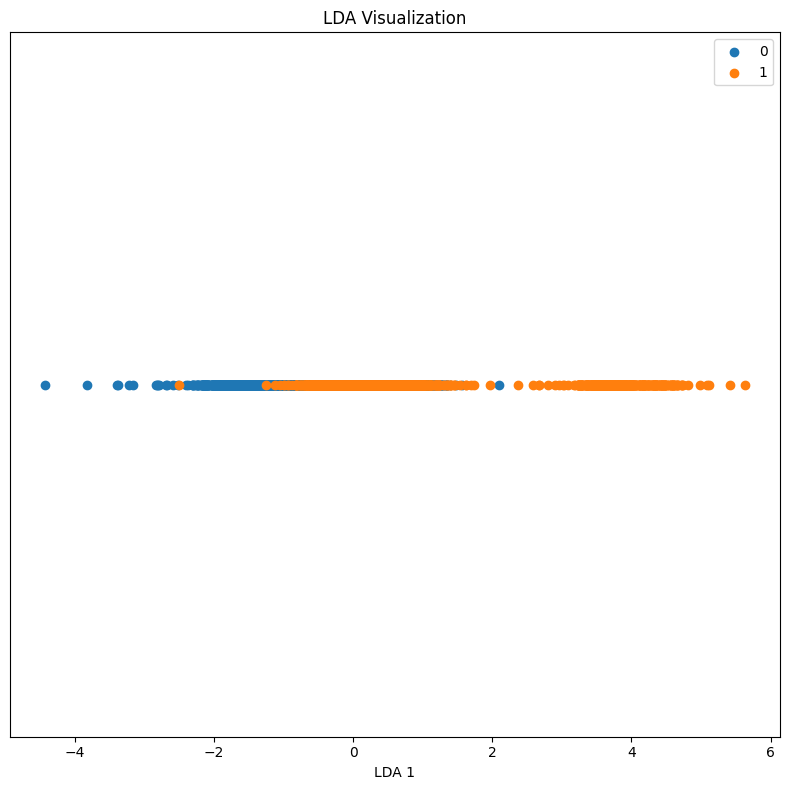

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 读取 data.csv 文件
data = pd.read_csv('data.csv')

# 检查数据是否存在缺失值
print("数据缺失值情况：")
print(data.isnull().sum())

# 假设最后一列为标签，其余列为特征
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values

# 对标签进行编码
le = LabelEncoder()
y = le.fit_transform(y)

# 识别分类特征和数值特征
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# 打印识别的特征类型，用于检查
print("分类特征：", categorical_features)
print("数值特征：", numerical_features)

# 创建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# 预处理数据
X_transformed = preprocessor.fit_transform(X)

# 计算最大允许的 n_components
n_features = X_transformed.shape[1]
n_classes = len(np.unique(y))
max_n_components = min(n_features, n_classes - 1)

# SVD 降维
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_transformed)

# PCA 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# t-SNE 降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_transformed)

# LDA 降维
lda = LinearDiscriminantAnalysis(n_components=max_n_components)
X_lda = lda.fit_transform(X_transformed, y)

# SVD 可视化
plt.figure(figsize=(8, 8))
for label in np.unique(y):
    plt.scatter(X_svd[y == label, 0], X_svd[y == label, 1], label=le.inverse_transform([label])[0])
plt.title("SVD Visualization")
plt.xlabel("SVD 1")
plt.ylabel("SVD 2")
plt.legend()
plt.tight_layout()
plt.show()

# PCA 可视化
plt.figure(figsize=(8, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=le.inverse_transform([label])[0])
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

# t-SNE 可视化
plt.figure(figsize=(8, 8))
for label in np.unique(y):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=le.inverse_transform([label])[0])
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.tight_layout()
plt.show()

# LDA 可视化
plt.figure(figsize=(8, 8))
if X_lda.shape[1] == 1:
    for label in np.unique(y):
        plt.scatter(X_lda[y == label, 0], np.zeros_like(X_lda[y == label, 0]), label=le.inverse_transform([label])[0])
    plt.ylabel('')
    plt.yticks([])
else:
    for label in np.unique(y):
        plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=le.inverse_transform([label])[0])
    plt.ylabel("LDA 2")
plt.title("LDA Visualization")
plt.xlabel("LDA 1")
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
# 导入相关库函数进而对数据进行初步的处理，包括数据读取、数据预处理、数据可视化等。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time # 导入 time 库
import warnings
warnings.filterwarnings("ignore")

# 正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False # 防止负号显示问题
 
# 导入 Pipeline 和相关预处理工具
from sklearn.pipeline import Pipeline #  用于创建机器学习工作流
from sklearn.compose import ColumnTransformer # 用于将不同的预处理应用于不同的列，之前是对datafame的某一列手动处理，如果在pipeline中直接用standardScaler等函数就会对所有列处理，所以要用到这个工具
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler # 用于数据预处理
from sklearn.impute import SimpleImputer # 用于处理缺失值
 
# 机器学习相关库
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split # 只导入 train_test_split
 
 
# --- 加载原始数据 ---
data = pd.read_csv('adult11.csv')
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
